Number of games : 4512


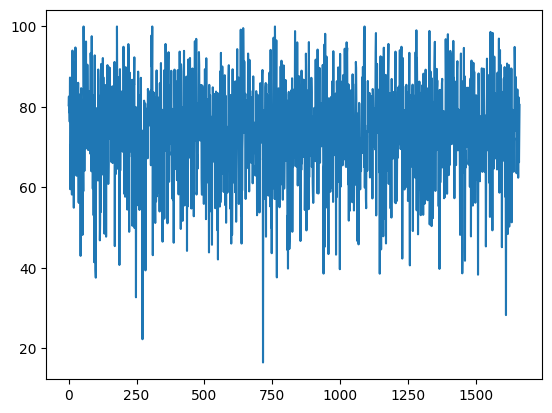

In [3]:
import requests
import matplotlib.pyplot as plt

# Write username here
username='bleepbleepblop'

year=2023

accuracies = []
ratings = []

# Loop to have every month of the year
for mois in range(1, 13):
  url = f"https://api.chess.com/pub/player/{username}/games/{year}/{mois:02d}"

  # Need it to not have 403 error
  headers = {
      'User-Agent': 'My User Agent 1.0'
  }

  # GET
  response = requests.get(url, headers=headers)

  if response.status_code == 200:
      data = response.json()

      for game in data['games']:
          if game['white']['username'].lower() == 'bleepbleepblop':
              white_rating = game['white']['rating']
              ratings.append(white_rating)
              white_accuracy = game['accuracies'].get('white') if 'accuracies' in game else 'N/A'
              if white_accuracy != 'N/A':
                accuracies.append(white_accuracy)
          elif game['black']['username'].lower() == 'bleepbleepblop':
              black_rating = game['black']['rating']
              ratings.append(black_rating)
              black_accuracy = game['accuracies'].get('black') if 'accuracies' in game else 'N/A'
              if black_accuracy != 'N/A':
                accuracies.append(black_accuracy)
  else:
      print(f"Failed to retrieve data: {response.status_code}")

# Number of games
print(f"Number of games : {len(ratings)}")

# Accuracy graph
plt.plot(accuracies)

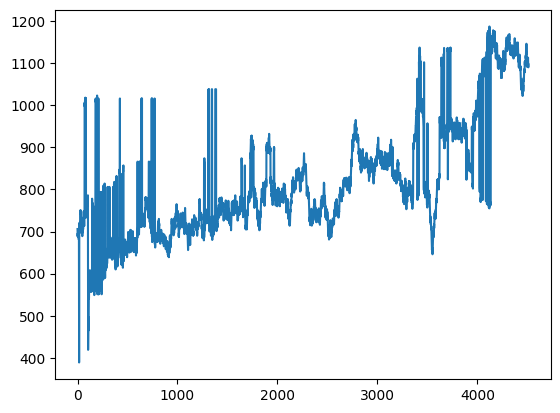

In [4]:
# Rating graph
plt.plot(ratings)